In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

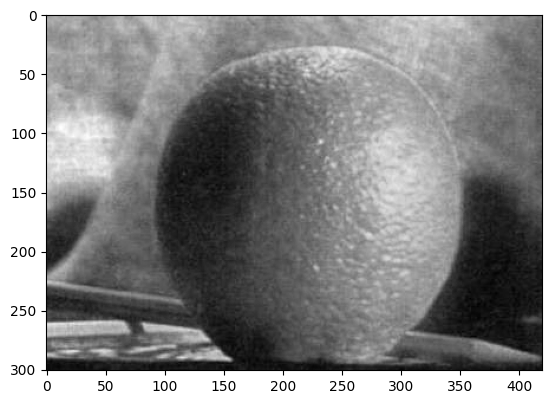

In [65]:
img = plt.imread('images/naranja.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [66]:
def getBorders(img):

    img = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    img = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)

    idx = img < 30
    img[idx] = 0

    kernel = np.ones((2, 2), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    return img

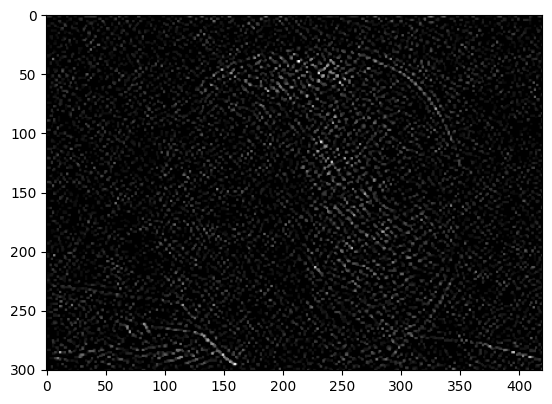

In [67]:
img_borders = getBorders(img)
plt.imshow(img_borders, cmap='gray')

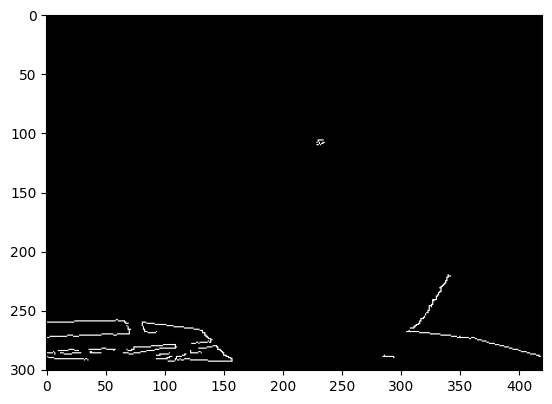

In [68]:
img_canny = cv2.Canny(img, 100, 200)
plt.imshow(img_canny, cmap='gray')

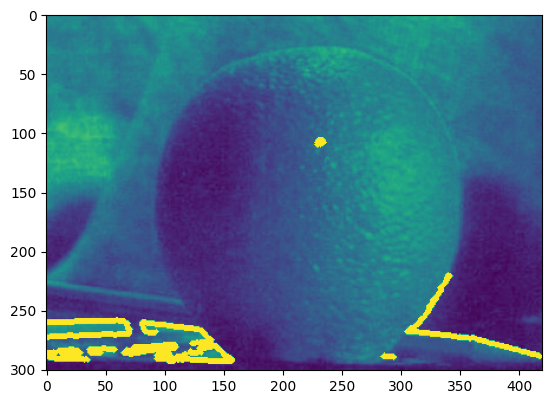

In [69]:
contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img, contours, -1, (255, 255, 255), 3)
plt.imshow(img_contours)

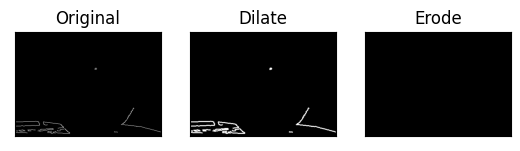

In [70]:
# Find strucutre elements for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Apply morphology operations
img_dilate = cv2.dilate(img_canny, kernel, iterations=1)
img_erode = cv2.erode(img_canny, kernel, iterations=1)

# Show results
plt.subplot(1, 3, 1), plt.imshow(img_canny, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(img_dilate, cmap='gray')
plt.title('Dilate'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(img_erode, cmap='gray')
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.show()